<a href="https://colab.research.google.com/github/Aparna106/SpotifySongPopularity/blob/main/SpotifyGenre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


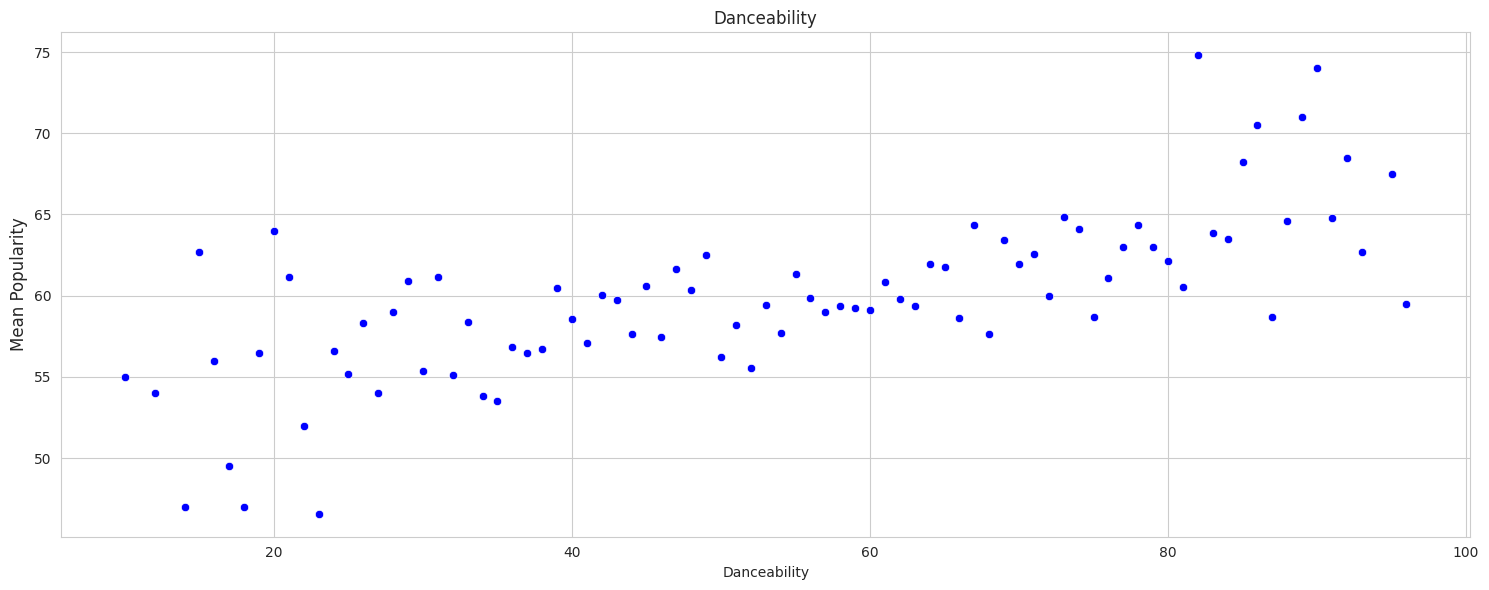

The most linear correlated features to POPULARITY are:
Loudness (dB)     -->  0.17 (abs)
Year              -->  0.16 (abs)
Danceability      -->  0.14 (abs)
Liveness          -->  0.11 (abs)
Speechiness       -->  0.11 (abs)
Energy            -->  0.10 (abs)
X_train:  (1395, 890)
X_test:  (599, 890)
y_train:  (1395,)
y_test:  (599,)
Logistic Regression Accuracy: 0.7161936560934892


In [67]:
# Visualizations
import pandas as pd
import numpy as np
import datetime
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
import matplotlib.pyplot as plt


# For transformations and predictions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Models to be used, all from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Transformers
from scipy.optimize import curve_fit
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import pairwise_distances
from six import StringIO

# For comparing metrics
from sklearn.metrics import mean_squared_error as mse

# For validation
from sklearn.model_selection import train_test_split as split


from matplotlib import pyplot as plt
import seaborn as sns


# Step 1: Data Preprocessing
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Spotify-2000.csv")

# Returns the first 1000 rows
df.head(1000)

df.isnull().sum()
# no nulls, allgood

# print(len(df.index))

df = df.iloc[0:2000]

# There were some non-numeric values contained in the duration column,
# that should have been measured in milliseconds
df[df["Length (Duration)"].str.contains(",")==True]

df["Length (Duration)"] = df["Length (Duration)"].replace(["1,412","1,121","1,367","1,292"],['1412','1121','1367','1292'])
#These were corrected manually

df["Length (Duration)"] = df["Length (Duration)"].astype(np.int64)
#Casting all values to integers

columns = ['Index', 'Title']
# for col in columns:
  # print(f'{col:<15}: {df[col].nunique()} unique values')

df = df.drop(labels=['Index', 'Title'], axis=1)
df.shape

#No duplicates
df.duplicated().sum()

#No null values
df.isnull().sum().sum()

#As danceability increases, popularity increases according to spotify
fig, ax = plt.subplots(1, figsize=(15, 6), sharey=True, sharex = True)
ax_data =  df.groupby('Danceability')['Popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x='Danceability', y='Popularity', data=ax_data, color='blue', ax=ax)
ax.set_title('Danceability')
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

#Results of initial numeric correlation, shows the features are not good indicators of target varible, popularity
corr = np.abs(numeric_df.corr())
series = np.abs(corr['Popularity']).sort_values(ascending=False)
print('The most linear correlated features to POPULARITY are:')
for i, row in enumerate(series):
    if 0.1 <= row < 1:
      print(f'{series.index[i]:17} --> {row: .2f} (abs)')

#feature engineering, classify popular songs as 1, more unpopular songs as 0
df['Popularity'].describe()
df['Popularity'] = pd.qcut(df['Popularity'], q=2, labels=[0, 1])
df["Popularity"].value_counts()
df['Popularity']

#One-hot encoding to get dummies function for the non-numeric values.
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

#one hot encoding the genre and artists
df = onehot_encode(df, 'Artist', 'artist')
df = onehot_encode(df, 'Top Genre', 'genre')
df

#splitting the data
y = df.loc[:, 'Popularity']
X = df.drop('Popularity', axis=1)
# X = X.drop('Top Genre', axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

#random = 369
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=369)

print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_acc = log_model.score(X_test, y_test)
print("Logistic Regression Accuracy:", log_acc)